In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

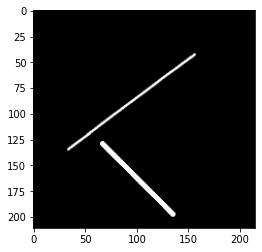

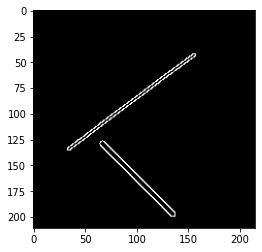

(-141.4213562373095, 141.4213562373095)

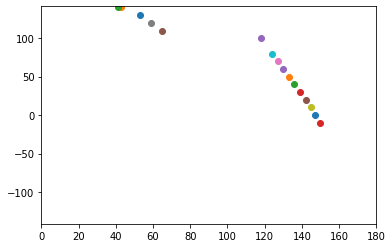

In [ ]:
#HoughLines
img = cv2.imread('2lines.png',0)
plt.imshow(img,cmap='gray')
plt.show()

edges = cv2.Canny(img,50,150,apertureSize=3)
plt.imshow(edges,cmap='gray')
plt.show()

lines = cv2.HoughLines(edges,10,np.pi/180,100)

#Change redian to degree
linesdegree = lines.copy()
linesdegree[:,0:1,1:2] = linesdegree[:,0:1,1:2]*180/np.pi

#use scatter plot
for i in range(0,len(linesdegree)):
  plt.scatter(linesdegree[i,0:1,1:2],linesdegree[i,0:1,0:1])

#set x,y limits
plt.xlim(0,180)
plt.ylim(-100*np.sqrt(2), 100*np.sqrt(2))

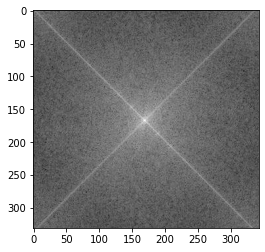

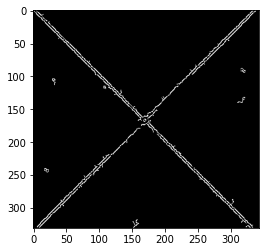

(-424.26406871192853, 424.26406871192853)

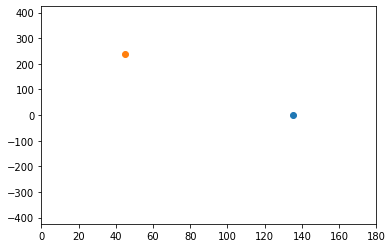

In [ ]:
#HoughLines ex.1
img = cv2.imread('findLines.png',0)
plt.imshow(img,cmap='gray')
plt.show()

#find edges
K_SIZE = 5
smoothed_img = cv2.GaussianBlur(img,(K_SIZE,K_SIZE),0)
edges = cv2.Canny(smoothed_img,36,85)

plt.imshow(edges,cmap='gray')
plt.show()

lines = cv2.HoughLines(edges,10,np.pi/180,800)

#Change radian to degree
linesdegree = lines.copy()
linesdegree[:,0:1,1:2] = linesdegree[:,0:1,1:2]*180/np.pi

#use scatter plot
for i in range(0,len(linesdegree)):
  plt.scatter(linesdegree[i,0:1,1:2],linesdegree[i,0:1,0:1])

#set x,y limits
plt.xlim(0,180)
plt.ylim(-300*np.sqrt(2), 300*np.sqrt(2))

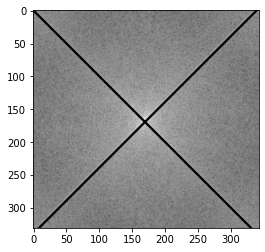

In [ ]:
out = cv2.imread('findLines.png',0)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(out,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(out,cmap='gray')
plt.show()


ผมเริ่มจากกำจัด noise ก่อนเอามาหา edges ด้วยการทำ gaussian blur เเล้วจากนั้นก็มาหา edge ด้วย canny แล้วใช้ houghtransform ปรับตัว threshold จะได้ กราฟ ออกมาดังรูปด้านบนมีการปรับ scale เพื่อให้เห็นจุดครบ จะสังเกตว่ามีสองจุด จุดทางซ้ายจะ represent เส้นทแยงจากมุมบนขวาไปมุมล่างซ้าย ส่วนจุดทางขวาจะ represent เส้นทแยงจากมุมบนซ้ายไปมุมล่างขวา

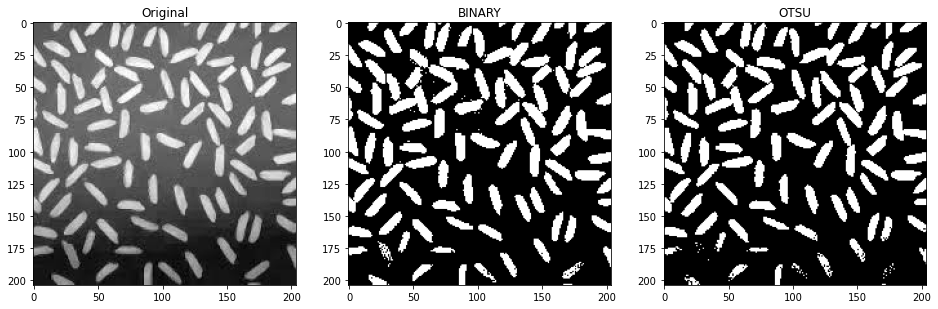

In [ ]:
img = cv2.imread('bacteria.png',0)
ret1,thresh1 = cv2.threshold(img,125,255,cv2.THRESH_BINARY)
ret2,thresh2 = cv2.threshold(img,0,255,cv2.THRESH_OTSU) #ret2 =

plt.figure(figsize=(16,12))
plt.subplot(1,3,1), plt.imshow(img,cmap='gray'), plt.title('Original')
plt.subplot(1,3,2), plt.imshow(thresh1,cmap='gray'), plt.title('BINARY')
plt.subplot(1,3,3), plt.imshow(thresh2,cmap='gray'), plt.title('OTSU')
plt.show()

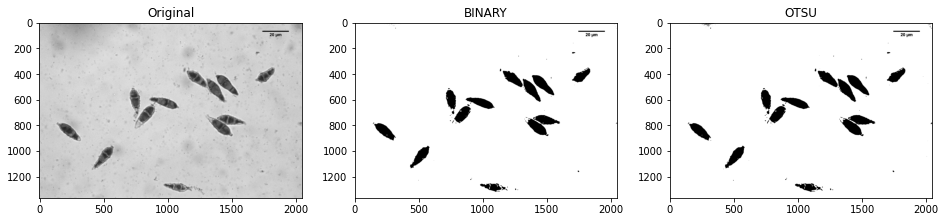

In [ ]:
#ex.2
img = cv2.imread('bac.jpg',0)
ret1,thresh1 = cv2.threshold(img,80,255,cv2.THRESH_BINARY)
ret2,thresh2 = cv2.threshold(img,0,255,cv2.THRESH_OTSU)

plt.figure(figsize=(16,12))
plt.subplot(1,3,1), plt.imshow(img,cmap='gray'), plt.title('Original')
plt.subplot(1,3,2), plt.imshow(thresh1,cmap='gray'), plt.title('BINARY')
plt.subplot(1,3,3), plt.imshow(thresh2,cmap='gray'), plt.title('OTSU') #ret2 = 89
plt.show()

  - Cutting the background og the image above using global threashold (OTSU threshold) which can remove the backgroud and keep all bacteria in countable shape. From OSTU threshold, we get the minimum bound at 89.